In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras as keras
from keras.models import Sequential
from keras.layers import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from os import listdir
import math

Differenze tra still, walking e running

Text(0.5, 1.0, 'Gyroscope Z-axis (Running)')

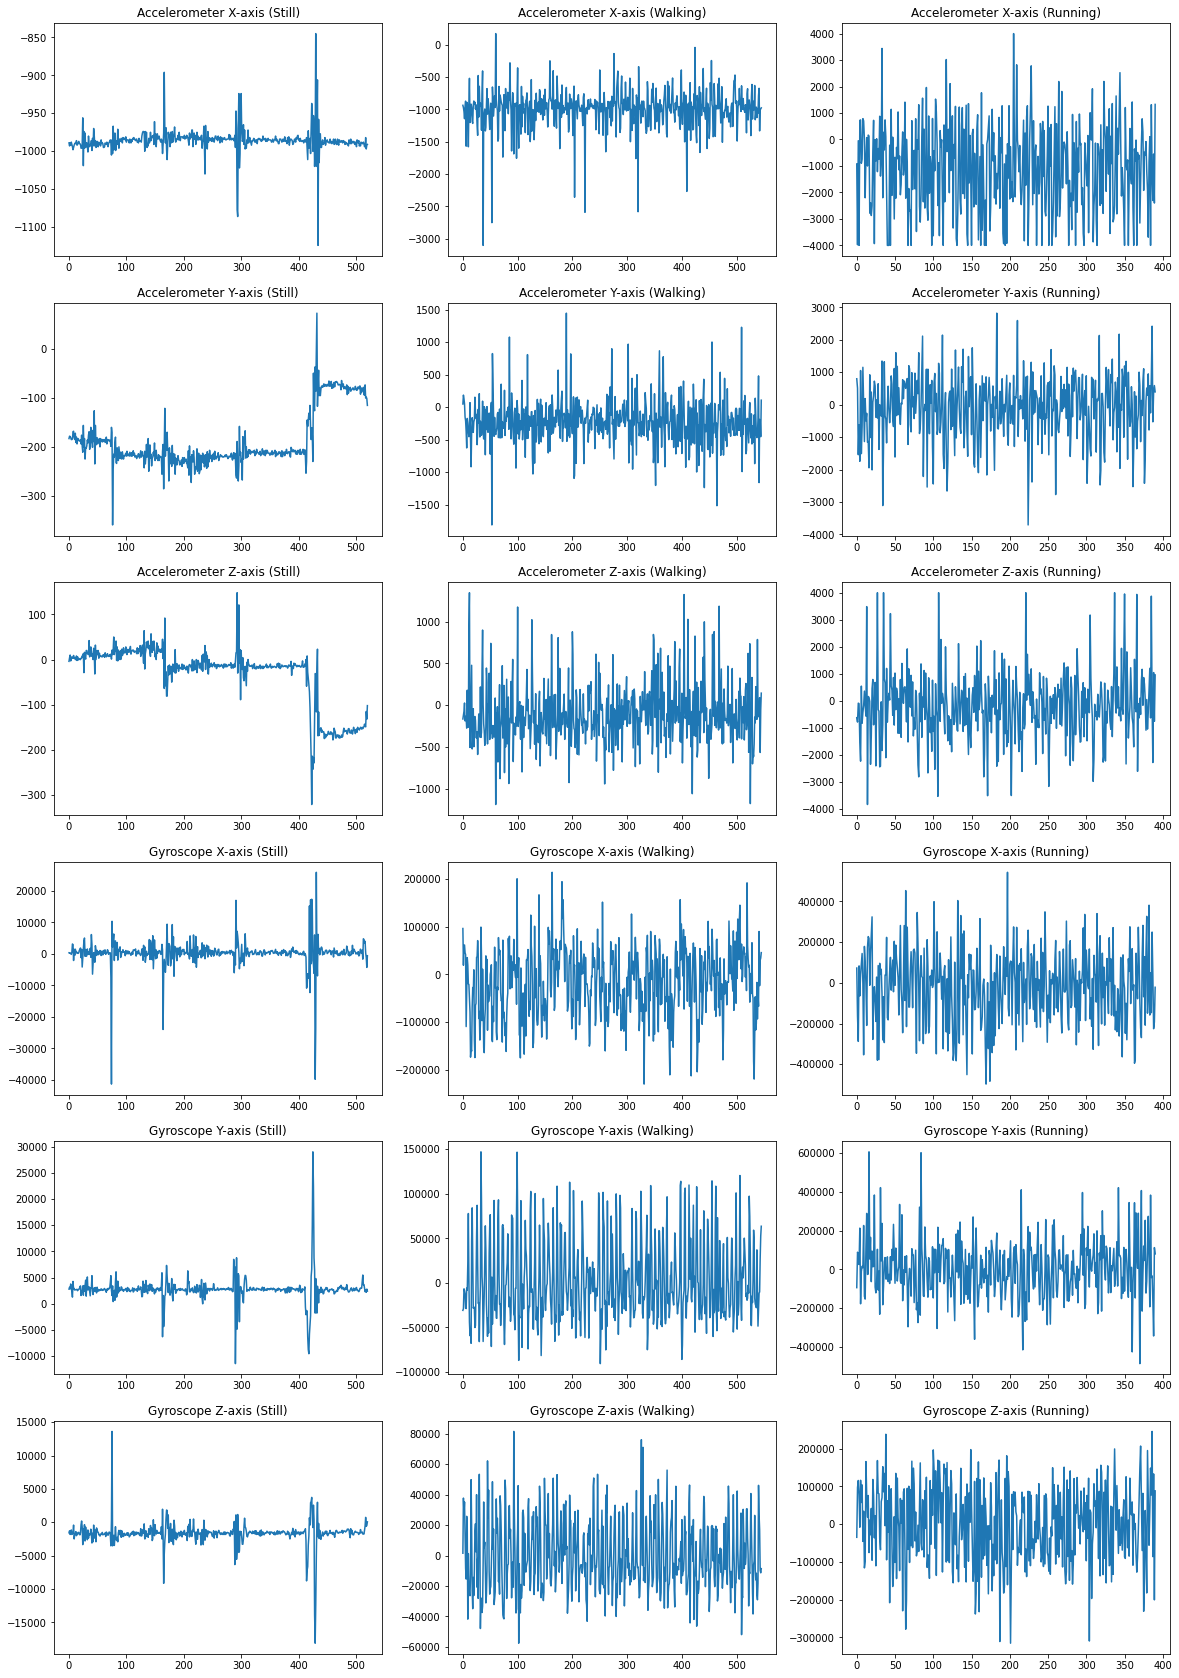

In [17]:
# relevant features
labels = ['xa', 'ya', 'za', 'xg', 'yg', 'zg']

still = pd.read_csv('datasets/still_19_02_2023_17_28_18.csv')
still = still[labels]

walking = pd.read_csv('datasets/walking_19_02_2023_17_10_11.csv')
walking = walking[labels]

running = pd.read_csv('datasets/running_23_02_2023_10_48_27.csv')
running = running[labels]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18)) = plt.subplots(6,3)

fig.set_figheight(30)
fig.set_figwidth(20)

ax1.plot(np.arange(0, still.shape[0]), still['xa'])
ax1.set_title('Accelerometer X-axis (Still)')

ax2.plot(np.arange(0, walking.shape[0]), walking['xa'])
ax2.set_title('Accelerometer X-axis (Walking)')

ax3.plot(np.arange(0, running.shape[0]), running['xa'])
ax3.set_title('Accelerometer X-axis (Running)')


ax4.plot(np.arange(0, still.shape[0]), still['ya'])
ax4.set_title('Accelerometer Y-axis (Still)')

ax5.plot(np.arange(0, walking.shape[0]), walking['ya'])
ax5.set_title('Accelerometer Y-axis (Walking)')

ax6.plot(np.arange(0, running.shape[0]), running['ya'])
ax6.set_title('Accelerometer Y-axis (Running)')


ax7.plot(np.arange(0, still.shape[0]), still['za'])
ax7.set_title('Accelerometer Z-axis (Still)')

ax8.plot(np.arange(0, walking.shape[0]), walking['za'])
ax8.set_title('Accelerometer Z-axis (Walking)')

ax9.plot(np.arange(0, running.shape[0]), running['za'])
ax9.set_title('Accelerometer Z-axis (Running)')

ax10.plot(np.arange(0, still.shape[0]), still['xg'])
ax10.set_title('Gyroscope X-axis (Still)')

ax11.plot(np.arange(0, walking.shape[0]), walking['xg'])
ax11.set_title('Gyroscope X-axis (Walking)')

ax12.plot(np.arange(0, running.shape[0]), running['xg'])
ax12.set_title('Gyroscope X-axis (Running)')


ax13.plot(np.arange(0, still.shape[0]), still['yg'])
ax13.set_title('Gyroscope Y-axis (Still)')

ax14.plot(np.arange(0, walking.shape[0]), walking['yg'])
ax14.set_title('Gyroscope Y-axis (Walking)')

ax15.plot(np.arange(0, running.shape[0]), running['yg'])
ax15.set_title('Gyroscope Y-axis (Running)')

ax16.plot(np.arange(0, still.shape[0]), still['zg'])
ax16.set_title('Gyroscope Z-axis (Still)')

ax17.plot(np.arange(0, walking.shape[0]), walking['zg'])
ax17.set_title('Gyroscope Z-axis (Walking)')

ax18.plot(np.arange(0, running.shape[0]), running['zg'])
ax18.set_title('Gyroscope Z-axis (Running)')



Lettura dei dataset dalla cartella datasets

In [18]:
# list of files inside datasets folder
files = listdir('datasets')

datasets = []
# datasets_train = []
# datasets_test = []

# for every file add a label
def add_activity(name, df):
    if 'still' in name:
        df['activity'] = 'still'
    elif 'walking' in name:
        df['activity'] = 'walking'
    else:
        df['activity'] = 'running'
    return df

# def split_data(df):
#     num_rows = df.shape[0]
#     num_test = math.floor(num_rows / 3)
#     num_train = num_rows - num_test

#     df_train = df.iloc[:num_train, :]
#     df_test = df.iloc[num_train:, :]

#     datasets_train.append(df_train)
#     datasets_test.append(df_test)

#     print(df_train.shape)
#     print(df_test.shape)

# add activity to the labels we are interested
labels.append('activity')

for file in files:
    df = add_activity(file, pd.read_csv(f'datasets/{file}'))
    df = df[labels]
    datasets.append(df)
    print("Dimensione dataset {} ".format(file), df.shape)

# for df in datasets:
#     split_data(df)

# df_train = pd.concat(datasets_train, ignore_index=True)
# df_test = pd.concat(datasets_test, ignore_index=True)

df_data = pd.concat(datasets)

# print("Dimensione merged dataset train ", df_train.shape)
# print("Dimensione merged dataset test ", df_test.shape)
print("Dimensione merged dataset", df_data.shape)



Dimensione dataset running_23_02_2023_10_46_08.csv  (420, 7)
Dimensione dataset running_23_02_2023_10_48_27.csv  (391, 7)
Dimensione dataset running_23_02_2023_10_55_12.csv  (481, 7)
Dimensione dataset still_19_02_2023_17_28_18.csv  (521, 7)
Dimensione dataset still_20_02_2023_15_28_07.csv  (1230, 7)
Dimensione dataset still_20_02_2023_15_30_50.csv  (814, 7)
Dimensione dataset still_20_02_2023_15_33_07.csv  (739, 7)
Dimensione dataset still_20_02_2023_15_35_32.csv  (830, 7)
Dimensione dataset still_20_02_2023_15_40_22.csv  (1710, 7)
Dimensione dataset still_20_02_2023_15_49_25.csv  (1284, 7)
Dimensione dataset still_20_02_2023_15_58_11.csv  (670, 7)
Dimensione dataset still_20_02_2023_16_00_41.csv  (840, 7)
Dimensione dataset walking_19_02_2023_17_10_11.csv  (546, 7)
Dimensione dataset walking_19_02_2023_17_16_37.csv  (705, 7)
Dimensione dataset walking_19_02_2023_17_19_05.csv  (654, 7)
Dimensione dataset walking_19_02_2023_17_21_28.csv  (790, 7)
Dimensione dataset walking_19_02_2023_1

Normalizzazione dei dati

In [19]:
normalizer = MinMaxScaler()
num_columns = df_data.shape[1]

normalizer.fit(df_data.iloc[:, 0 : num_columns-1])

def normalize_df(df):
    
    norm_df = df.copy()
    norm_column = normalizer.transform(df.iloc[:, 0 : num_columns-1])
    norm_df.iloc[:, 0 : num_columns-1] = norm_column

    return norm_df

# norm_train_df = normalize_df(df_train)
# norm_test_df = normalize_df(df_test)
norm_df = normalize_df(df_data)


# fig, ((ax1, ax2),( ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)
# ax1.plot(np.arange(0, len(df_train.xa)), df_train.xa)
# ax3.plot(np.arange(0, len(df_train.ya)), df_train.ya)
# ax5.plot(np.arange(0, len(df_train.za)), df_train.za)

# ax2.plot(np.arange(0, len(norm_train_df.xa)), norm_train_df.xa)
# ax4.plot(np.arange(0, len(norm_train_df.ya)), norm_train_df.ya)
# ax6.plot(np.arange(0, len(norm_train_df.za)), norm_train_df.za)

# fig, ((ax1, ax2),( ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)
# ax1.plot(np.arange(0, len(df_test.xa)), df_test.xa)
# ax3.plot(np.arange(0, len(df_test.ya)), df_test.ya)
# ax5.plot(np.arange(0, len(df_test.za)), df_test.za)

# ax2.plot(np.arange(0, len(norm_test_df.xa)), norm_test_df.xa)
# ax4.plot(np.arange(0, len(norm_test_df.ya)), norm_test_df.ya)
# ax6.plot(np.arange(0, len(norm_test_df.za)), norm_test_df.za)

norm_df

,xa,ya,za,xg,yg,zg,activity
0,0.428232,0.424494,0.375594,0.298468,0.386082,0.530473,running
1,0.000000,0.435537,0.561265,0.275907,0.295563,0.464691,running
2,0.279320,0.664133,0.461615,0.542472,0.465577,0.371260,running
3,0.646412,0.629858,0.484496,0.450837,0.442317,0.441242,running
4,0.548262,0.646924,0.474244,0.505559,0.398085,0.341881,running
...,...,...,...,...,...,...,...
641,0.478370,0.609924,0.523506,0.653015,0.479963,0.447354,walking
642,0.462991,0.575792,0.491748,0.504040,0.558851,0.461133,walking
643,0.475369,0.534203,0.435609,0.508177,0.426296,0.421077,walking
644,0.387347,0.654525,0.702801,0.473657,0.428772,0.406478,walking


Resize datasets

In [20]:
def reshape_data(df, time_steps, step):
    Xs = []
    ys = []

    num_cols = df.shape[1]

    X = df.iloc[:, :num_cols - 1]
    y = df.iloc[:, num_cols - 1:]

    print(X.shape)

    for i in range(0, len(X) - time_steps, step):
        values = X.iloc[i : (i+time_steps)].values
        labels = y.iloc[i : i + time_steps]
        Xs.append(values)
        ys.append(labels.mode()['activity'][0])
    
    return np.array(Xs), np.array(ys).reshape(-1, 1)


# X_train , y_train = reshape_data(norm_train_df, 20, 20)
# X_test , y_test = reshape_data(norm_test_df, 20, 20)

X_data, y_data = reshape_data(norm_df, 20, 20)
print(X_data.shape)


(15920, 6)
(795, 20, 6)


Split test and train data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (532, 20, 6)
X_test shape:  (263, 20, 6)
y_train shape:  (532, 1)
y_test shape:  (263, 1)


OneHotEncoder per la y

In [22]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(y_train)

def encode_y(y):
    encoded_y = encoder.transform(y)
    return encoded_y

encoded_y_train = encode_y(y_train)
encoded_y_test = encode_y(y_test)


print(encoder.categories_)
# print(y_train)
print(pd.DataFrame(encoded_y_train, columns=encoder.categories_))

[array(['running', 'still', 'walking'], dtype='<U7')]
    running still walking
0       0.0   1.0     0.0
1       0.0   0.0     1.0
2       0.0   1.0     0.0
3       0.0   1.0     0.0
4       1.0   0.0     0.0
..      ...   ...     ...
527     0.0   1.0     0.0
528     0.0   1.0     0.0
529     0.0   1.0     0.0
530     0.0   1.0     0.0
531     0.0   1.0     0.0

[532 rows x 3 columns]


In [23]:
# stampa delle dimensioni

print(X_train.shape)
print(X_test.shape)

print(encoded_y_train.shape)
print(encoded_y_test.shape)
encoded_y_train

(532, 20, 6)
(263, 20, 6)
(532, 3)
(263, 3)


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

# Modello

In [24]:
model = Sequential()
model.add(Dense(16, input_shape=[X_train.shape[1], X_train.shape[2]], activation='relu'))
# model.add(LSTM(units=8, input_shape=[X_train.shape[1], X_train.shape[2]]))
# model.add(Dropout(rate=0.3))
# model.add(BatchNormalization())
model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(rate=0.3))
# model.add(BatchNormalization())
model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(rate=0.3))
# model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(encoded_y_train.shape[1], activation = 'softmax'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20, 16)            112       
                                                                 
 dense_1 (Dense)             (None, 20, 32)            544       
                                                                 
 dense_2 (Dense)             (None, 20, 32)            1056      
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1923      
                                                                 
Total params: 3,635
Trainable params: 3,635
Non-trainable params: 0
_________________________________________________________________
None


Modello - ottimizzatore e funzione di perdita

In [25]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

Early stopping per evitare overfitting

In [26]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [27]:
history = model.fit(
    X_train, encoded_y_train,
    validation_data=(X_test, encoded_y_test),
    # validation_split=0.1,
    # batch_size=1,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
17/17 [==============================] - 1s 14ms/step - loss: 0.9351 - accuracy: 0.5451 - val_loss: 0.8431 - val_accuracy: 0.5589
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8318 - accuracy: 0.5357 - val_loss: 0.7839 - val_accuracy: 0.5627
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7435 - accuracy: 0.6259 - val_loss: 0.6924 - val_accuracy: 0.8517
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6270 - accuracy: 0.8891 - val_loss: 0.5762 - val_accuracy: 0.8365
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.8966 - val_loss: 0.4733 - val_accuracy: 0.8593
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3960 - accuracy: 0.8985 - val_loss: 0.4265 - val_accuracy: 0.8593
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3555 - accuracy: 0.8947 - val_loss: 0.4451 - val_accuracy: 0.8593
Epoch 8/100


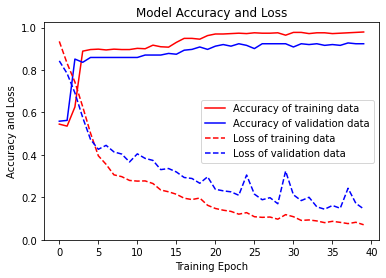

In [28]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

Matrice per l'affidabilità della predizione sui dati di validazione

9/9 [==============================] - 0s 1ms/step


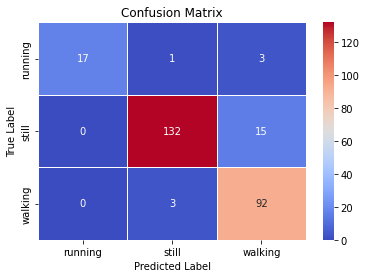

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.97      0.90      0.93       147
           2       0.84      0.97      0.90        95

    accuracy                           0.92       263
   macro avg       0.94      0.89      0.91       263
weighted avg       0.92      0.92      0.92       263



In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
def show_confusion_matrix(validations, predictions):

    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=['running', 'still', 'walking'],
                yticklabels=['running', 'still', 'walking'],
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(X_test)

# indice della massima probabilità
max_y_pred_test = np.argmax(y_pred_test, axis=1)

max_y_test = np.argmax(encoded_y_test, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

In [30]:
model.evaluate(X_test, encoded_y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.9163


[0.14421887695789337, 0.9163498282432556]

piccolo test con alcuni dati in input

In [33]:
data_still = pd.read_csv('datasets/walking_19_02_2023_17_21_28.csv')[labels[0:-1]]

data_norm = normalize_df(data_still)

data_input = []

count_still = 0
count_walking = 0

# resize data in signals of 20 samples
for i in range(0, data_norm.shape[0]-20, 20):
    data_input.append(data_norm.iloc[i:(i+20), :])

# classify the input
res = model.predict(np.array(data_input))
print(res)

# get the index of the biggest probability (0 = still, 1 = walking)
res = np.argmax(res, axis=1)
print(res)

for value in res:
    if value == 0:
        count_still += 1
    else:
        count_walking +=1

print(count_still, '-', count_walking)
print('accuracy = ', count_walking / (count_still + count_walking))


2/2 [==============================] - 0s 2ms/step
[[0.03269495 0.01219823 0.95510685]
 [0.0248779  0.03340751 0.9417146 ]
 [0.05632543 0.03729889 0.90637565]
 [0.00651757 0.09494727 0.89853513]
 [0.01472767 0.01333543 0.97193694]
 [0.01167442 0.05503781 0.9332878 ]
 [0.01363852 0.02295719 0.9634043 ]
 [0.02030283 0.04006331 0.9396339 ]
 [0.04475825 0.00457556 0.9506662 ]
 [0.04178832 0.07462781 0.88358384]
 [0.02858176 0.04002144 0.93139684]
 [0.02740503 0.01295148 0.9596434 ]
 [0.05501458 0.00251629 0.9424692 ]
 [0.06780584 0.01219812 0.91999596]
 [0.02013233 0.06878328 0.91108435]
 [0.00501093 0.00393093 0.9910581 ]
 [0.02667404 0.0921491  0.8811768 ]
 [0.04430287 0.04126997 0.91442716]
 [0.05884171 0.00475889 0.93639946]
 [0.02095722 0.0839192  0.8951236 ]
 [0.04382939 0.04494159 0.9112291 ]
 [0.02927091 0.03346271 0.93726635]
 [0.01779134 0.02294556 0.9592631 ]
 [0.01972587 0.04981299 0.93046117]
 [0.02696626 0.00681243 0.96622133]
 [0.05261913 0.08274397 0.8646369 ]
 [0.02114266 

In [36]:
model.save('activity_classifier_model')

# convert model to tensorflow lite
converter = tf.lite.TFLiteConverter.from_saved_model('activity_classifier_model')
tflite_model = converter.convert()

# Save the model to disk
open("./activity_classifier.tflite", "wb").write(tflite_model)


import os
basic_model_size = os.path.getsize("activity_classifier.tflite")
print("Model is %d bytes" % basic_model_size)

# da eseguire in un ambiente linux o colab
# !echo "const unsigned char model[] = {" > /content/model.h
# !cat gesture_model.tflite | xxd -i      >> /content/model.h
# !echo "};"                              >> /content/model.h

# import os
# model_h_size = os.path.getsize("model.h")
# print(f"Header file, model.h, is {model_h_size:,} bytes.")
# print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

INFO:tensorflow:Assets written to: activity_classifier_model\assets


INFO:tensorflow:Assets written to: activity_classifier_model\assets


Model is 22588 bytes
